In [0]:
import pre
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score


In [0]:
layer=1 #Change to 0 or 1 , 0 for layer 1 , 1 for layer 2

In [10]:
label=label=pre.create_label(layer)
corpus=pre.create_sentence_list(1)
from nltk.stem import SnowballStemmer
 
st = SnowballStemmer("english")
text = pre.norm_corpus
 
output = []
for sentence in text:
    output.append(" ".join([st.stem(i) for i in sentence.split()]))
fileid=pre.fileid
tv = TfidfVectorizer(min_df=0., max_df=1.,max_features=1500 ,use_idf=False,lowercase=True,ngram_range=(1,2),analyzer=u'word',smooth_idf=False)
tv_matrix = tv.fit_transform(output)
tv_matrix = tv_matrix.toarray()

print(len(tv_matrix))
print(label)
print(pre.norm_corpus)

13531
[['NULL'], ['CMP'], ['EMP'], ['NOV', 'CMP'], ['NULL'], ['EMP'], ['CMP', 'EMP'], ['NULL'], ['NULL'], ['NULL'], ['NULL'], ['NULL'], ['NULL'], ['CLA'], ['CMP'], ['SUB'], ['CMP', 'EMP'], ['SUB', 'EMP'], ['SUB', 'CMP'], ['EMP'], ['EMP'], ['NULL'], ['NULL'], ['NULL'], ['NULL'], ['EMP'], ['CMP'], ['NULL'], ['EMP'], ['EMP'], ['EMP'], ['EMP'], ['EMP'], ['EMP'], ['CMP'], ['NULL'], ['NULL'], ['EMP'], ['SUB'], ['SUB', 'REC'], ['EMP'], ['EMP'], ['EMP'], ['EMP'], ['EMP'], ['EMP'], ['NULL'], ['PNF'], ['EMP'], ['SUB', 'CMP'], ['CLA', 'SUB', 'EMP'], ['SUB', 'CMP'], ['NULL'], ['EMP'], ['NULL'], ['IMP', 'EMP'], ['EMP'], ['EMP'], ['IMP', 'EMP'], ['EMP'], ['NULL'], ['NULL'], ['NULL'], ['NULL'], ['NULL'], ['NULL'], ['EMP'], ['CNT'], ['EMP'], ['EMP'], ['NULL'], ['EMP'], ['NULL'], ['SUB', 'CMP'], ['SUB', 'CMP'], ['EMP'], ['EMP'], ['EMP'], ['EMP'], ['CMP'], ['SUB'], ['CLA'], ['CLA'], ['NULL'], ['NULL'], ['CMP'], ['CMP'], ['EMP'], ['CMP'], ['SUB'], ['SUB'], ['CLA'], ['SUB'], ['SUB'], ['EMP'], ['EMP'], ['C

In [0]:
new_label=[]
new_tv=[]
new_fileid=[]
new_corpus=[]
length = len(tv_matrix)
for i in range(0, length):
  for j in range(0,len(label[i])):
    new_tv.append(tv_matrix[i])
    new_label.append(label[i][j])
    new_fileid.append(fileid[i])
    new_corpus.append(text[i])

In [12]:
import numpy as np
num_rows= len(new_tv)
num_colms=len(new_tv[0])
modified_tv=[]
padding=np.zeros(num_colms, dtype = int)
num_rows= len(new_tv)
for i in range(0,num_rows):
  if (i ==0):
    x=np.append(padding,new_tv[0])
    x=np.append(x,new_tv[1])
    modified_tv.append(x)

  elif(i==(num_rows-1)):
    x=np.append(new_tv[num_rows-2],new_tv[num_rows-1])
    x=np.append(x,padding)
    modified_tv.append(x)
  else:
    x=np.append(new_tv[i-1],new_tv[i])
    x=np.append(x,new_tv[i+1])
    modified_tv.append(x)

modified_tv
df_tfidf=pre.pd.DataFrame(pre.np.round(modified_tv, 10))
df_tfidf["tag"]=new_label
df_tfidf

0    1    2    3    4    5  ...  4495  4496  4497  4498  4499   tag
0      0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0  NULL
1      0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   CMP
2      0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   EMP
3      0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   NOV
4      0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   CMP
...    ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   ...   ...
14928  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   EMP
14929  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   EMP
14930  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   EMP
14931  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   PNF
14932  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   EMP

[14933 rows x 4501 columns]

Creating X

In [13]:
import numpy as np
X_df=df_tfidf[df_tfidf.columns[0:-1]] #X dataframe
X=X_df.to_numpy()    # X in array
y=df_tfidf["tag"]
print(np.unique(df_tfidf["tag"]))
class_names=np.unique(df_tfidf["tag"])

['APR' 'CLA' 'CMP' 'CNT' 'EMP' 'IMP' 'NOV' 'NULL' 'PNF' 'REC' 'SUB']


SPLIT

In [14]:
from sklearn.model_selection import train_test_split
from collections import Counter
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.33, shuffle=False)
y_tr=y_tr.reset_index()['tag'].tolist()
print(X_tr.shape)
print(len(y_tr))

(10005, 4500)
10005


In [15]:
keys_level1=['INT', 'PDI', 'MET', 'RWK', 'DAT', 'RES', 'ANA', 'TNF', 'EXP', 'BIB', 'OAL', 'FWK', 'EXT', 'ABS', 'CNT']
keys_level2=['NULL', 'CMP', 'EMP', 'NOV', 'CLA', 'SUB', 'IMP', 'REC', 'CNT', 'PNF', 'APR']

freq_train=Counter(y_tr)
print(freq_train)
c=0
def increase(keys, freq, sen,tag,threshold):
  length=len(sen)
  for key in keys:
    
    if (freq[key] < threshold and freq[key] > 0):
      inc= int(threshold/ freq[key])
      for i in range(0,length):
        if (tag[i] == key):
          for j in range(0,inc):
            tag.append(tag[i])
            sen= np.append(sen, [sen[i]], axis=0)
            global c
            c=c+1
    global X_train
    X_train = sen
    global y_train
    y_train = tag

if(layer == 0):
  keys=keys_level1
else:
  keys=keys_level2

increase(keys, freq_train, X_tr, y_tr,1500)#3rd argument is oversampling value(can be changed)
print(Counter(y_train))

Counter({'EMP': 4117, 'NULL': 2092, 'CMP': 832, 'SUB': 813, 'CLA': 590, 'PNF': 473, 'IMP': 424, 'NOV': 342, 'REC': 140, 'CNT': 113, 'APR': 69})
Counter({'EMP': 4117, 'NULL': 2092, 'CNT': 1582, 'CMP': 832, 'SUB': 813, 'CLA': 590, 'PNF': 473, 'IMP': 424, 'NOV': 342, 'REC': 140, 'APR': 69})


In [16]:
print(X_train.shape)
print(len(y_train))
print(c)
print(length)
print(y_train)

(11474, 4500)
11474
1469
13531
['NULL', 'CMP', 'EMP', 'NOV', 'CMP', 'NULL', 'EMP', 'CMP', 'EMP', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'CLA', 'CMP', 'SUB', 'CMP', 'EMP', 'SUB', 'EMP', 'SUB', 'CMP', 'EMP', 'EMP', 'NULL', 'NULL', 'NULL', 'NULL', 'EMP', 'CMP', 'NULL', 'EMP', 'EMP', 'EMP', 'EMP', 'EMP', 'EMP', 'CMP', 'NULL', 'NULL', 'EMP', 'SUB', 'SUB', 'REC', 'EMP', 'EMP', 'EMP', 'EMP', 'EMP', 'EMP', 'NULL', 'PNF', 'EMP', 'SUB', 'CMP', 'CLA', 'SUB', 'EMP', 'SUB', 'CMP', 'NULL', 'EMP', 'NULL', 'IMP', 'EMP', 'EMP', 'EMP', 'IMP', 'EMP', 'EMP', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'EMP', 'CNT', 'EMP', 'EMP', 'NULL', 'EMP', 'NULL', 'SUB', 'CMP', 'SUB', 'CMP', 'EMP', 'EMP', 'EMP', 'EMP', 'CMP', 'SUB', 'CLA', 'CLA', 'NULL', 'NULL', 'CMP', 'CMP', 'EMP', 'CMP', 'SUB', 'SUB', 'CLA', 'SUB', 'SUB', 'EMP', 'EMP', 'CLA', 'CLA', 'CLA', 'SUB', 'NULL', 'NULL', 'EMP', 'EMP', 'EMP', 'SUB', 'EMP', 'SUB', 'EMP', 'SUB', 'PNF', 'EMP', 'CNT', 'EMP', 'EMP', 'EMP', 'EMP', 'EMP', 'EMP', 'EMP', 

LOGISTIC

In [17]:

import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
logmodel = LogisticRegression(class_weight='balanced',solver='liblinear')
logmodel.fit(X_train,y_train)
y_pred = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

         APR       0.48      0.29      0.36        41
         CLA       0.49      0.56      0.52       264
         CMP       0.34      0.39      0.37       430
         CNT       0.04      0.10      0.06        41
         EMP       0.60      0.50      0.54      2074
         IMP       0.20      0.24      0.22       268
         NOV       0.53      0.57      0.55       188
        NULL       0.45      0.48      0.47       987
         PNF       0.31      0.39      0.35       184
         REC       0.57      0.54      0.56        72
         SUB       0.25      0.26      0.25       379

    accuracy                           0.45      4928
   macro avg       0.39      0.39      0.39      4928
weighted avg       0.47      0.45      0.46      4928

Accuracy: 0.4510957792207792


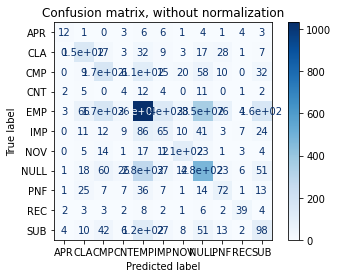

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(logmodel, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

plt.show()

def heatconmat(y_true,y_pred):
    sns.set_context('talk')
    plt.figure(figsize=(9,6))
    sns.heatmap(confusion_matrix(y_true,y_pred),
                annot=True,
                fmt='d',
                cbar=False,
                cmap='gist_earth_r',
                yticklabels=sorted(y_test.unique()))
    plt.show()
    print(classification_report(y_true,y_pred))

MULTINOMIAL

In [20]:
import sklearn.metrics as metrics
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

         APR       0.00      0.00      0.00        41
         CLA       0.63      0.33      0.43       264
         CMP       0.47      0.04      0.08       430
         CNT       0.04      0.07      0.06        41
         EMP       0.48      0.85      0.61      2074
         IMP       1.00      0.01      0.01       268
         NOV       0.71      0.05      0.10       188
        NULL       0.48      0.43      0.45       987
         PNF       0.48      0.07      0.12       184
         REC       0.83      0.07      0.13        72
         SUB       0.08      0.01      0.01       379

    accuracy                           0.47      4928
   macro avg       0.47      0.18      0.18      4928
weighted avg       0.49      0.47      0.39      4928

Accuracy: 0.47382305194805197


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

plt.show()

RANDOM FOREST

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
clf = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt',class_weight='balanced_subsample')

import sklearn.metrics as metrics
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         APR       0.33      0.02      0.05        41
         CLA       0.71      0.50      0.59       264
         CMP       0.46      0.32      0.38       430
         CNT       0.20      0.02      0.04        41
         EMP       0.50      0.85      0.63      2074
         IMP       0.54      0.06      0.10       268
         NOV       0.64      0.52      0.58       188
        NULL       0.53      0.32      0.39       987
         PNF       0.51      0.27      0.35       184
         REC       0.62      0.40      0.49        72
         SUB       0.43      0.02      0.04       379

    accuracy                           0.52      4928
   macro avg       0.50      0.30      0.33      4928
weighted avg       0.51      0.52      0.46      4928

Accuracy: 0.5162337662337663


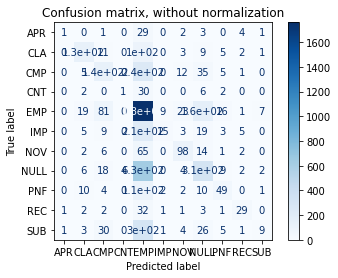

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

plt.show()

SVM

In [0]:
from sklearn import svm
from sklearn.model_selection import train_test_split
# Make a decision tree and train
clf = svm.SVC(class_weight='balanced',decision_function_shape='ovo')
import sklearn.metrics as metrics
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

plt.show()

SGD

In [0]:

from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

plt.show()

DECISION TREE

In [0]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

plt.show()